# <center><b>Analysis and Visualization of Global Renewable Energy Trends<b></center>

**Objective:** To analyze global renewable energy data and visualize the trends, challenges, and progress in renewable energy adoption.

**Approach:**
* Use publicly available datasets on renewable energy production, consumption, and investments from international databases.
* Analyze this data to identify trends, such as the growth rate of different renewable energy sources (solar, wind, hydroelectric) in various countries.
* Create visualizations like line graphs, bar charts, and world maps to illustrate these trends, showing the progress and disparities in renewable energy adoption globally.

## **Implementation**

### **1. Data Cleaning:**

In [7]:
# Step 1: Load the Dataset
import pandas as pd
file_path = 'data\owid-energy-data.csv'
energy_data = pd.read_csv(file_path)

In [8]:
# Step 2: Dropping columns that start with the specified prefixes
prefixes_to_drop = ['coal', 'carbon', 'fossil', 'gas', 'low_carbon', 'nuclear', 'oil']
columns_to_drop = [col for col in energy_data.columns if any(col.startswith(prefix) for prefix in prefixes_to_drop)]
cleaned_data = energy_data.drop(columns=columns_to_drop)

# Displaying the first few rows of the modified dataset to verify the changes
energy_data_cleaned = cleaned_data
cleaned_data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [9]:
# Step 3: Impute Missing Values for Numerical Columns with Median

# Separate numerical and categorical columns
numerical_cols = energy_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values for numerical columns with median
for col in numerical_cols:
    energy_data_cleaned[col].fillna(energy_data_cleaned[col].median(), inplace=True)

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2342044593.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_data_cleaned[col].fillna(energy_data_cleaned[col].median(), inplace=True)
C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2342044593.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [10]:
# Step 4: Impute Missing Values for Categorical Columns with the Most Frequent Value

# Separate categorical columns
categorical_cols = energy_data_cleaned.select_dtypes(include=['object']).columns

# Impute missing values for categorical columns with the most frequent value
for col in categorical_cols:
    energy_data_cleaned[col].fillna(energy_data_cleaned[col].mode()[0], inplace=True)

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3392926865.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_data_cleaned[col].fillna(energy_data_cleaned[col].mode()[0], inplace=True)


In [11]:
# Step 5: Check Final Missing Values and Display Cleaned Dataset

# Check the result
final_missing_values = energy_data_cleaned.isnull().sum().sum()
print("Final missing values after imputation:", final_missing_values)

# Display the cleaned dataset
print(energy_data_cleaned.head())
print(len(energy_data_cleaned.columns))

Final missing values after imputation: 0
         country  year iso_code  population           gdp  \
0  ASEAN (Ember)  2000      ARG   6975947.5  4.395846e+10   
1  ASEAN (Ember)  2001      ARG   6975947.5  4.395846e+10   
2  ASEAN (Ember)  2002      ARG   6975947.5  4.395846e+10   
3  ASEAN (Ember)  2003      ARG   6975947.5  4.395846e+10   
4  ASEAN (Ember)  2004      ARG   6975947.5  4.395846e+10   

   biofuel_cons_change_pct  biofuel_cons_change_twh  biofuel_cons_per_capita  \
0                    8.179                      0.0                   15.482   
1                    8.179                      0.0                   15.482   
2                    8.179                      0.0                   15.482   
3                    8.179                      0.0                   15.482   
4                    8.179                      0.0                   15.482   

   biofuel_consumption  biofuel_elec_per_capita  ...  solar_share_elec  \
0                0.673               

In [12]:
# Step 6: Ensure Data Consistency

# Verify Numerical Values
for col in numerical_cols:
    # Convert to numeric, coercing errors to NaN
    energy_data_cleaned[col] = pd.to_numeric(energy_data_cleaned[col], errors='coerce')
    # Re-impute missing values caused by conversion errors with median
    energy_data_cleaned[col].fillna(energy_data_cleaned[col].median(), inplace=True)

# Verify the changes
print(energy_data_cleaned[numerical_cols].head())
print(energy_data_cleaned[categorical_cols].head())

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1855935609.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_data_cleaned[col].fillna(energy_data_cleaned[col].median(), inplace=True)
C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1855935609.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

   year  population           gdp  biofuel_cons_change_pct  \
0  2000   6975947.5  4.395846e+10                    8.179   
1  2001   6975947.5  4.395846e+10                    8.179   
2  2002   6975947.5  4.395846e+10                    8.179   
3  2003   6975947.5  4.395846e+10                    8.179   
4  2004   6975947.5  4.395846e+10                    8.179   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      0.0                   15.482                0.673   
1                      0.0                   15.482                0.673   
2                      0.0                   15.482                0.673   
3                      0.0                   15.482                0.673   
4                      0.0                   15.482                0.673   

   biofuel_elec_per_capita  biofuel_electricity  biofuel_share_elec  ...  \
0                    0.491                 5.87               1.550  ...   
1                 

### **2. Data Exploration:**

In [13]:
# Step 1: Generate Summary Statistics
import pandas as pd

# Generate summary statistics for key numerical columns
key_numerical_columns = [
    'solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption',
    'solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity'
]

summary_statistics = energy_data_cleaned[key_numerical_columns].describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
        solar_consumption  wind_consumption  hydro_consumption  \
count       21748.000000      21748.000000       21748.000000   
mean            4.639880         11.657322         138.342446   
std            66.421524        129.506021         594.315548   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.005000          35.347000   
50%             0.000000          0.005000          35.347000   
75%             0.000000          0.005000          35.347000   
max          3448.237000       5487.600000       11448.027000   

       biofuel_consumption  solar_electricity  wind_electricity  \
count         21748.000000       21748.000000      21748.000000   
mean              5.430796           2.939488          6.953983   
std              41.713804          36.392559         67.229000   
min               0.000000           0.000000          0.000000   
25%               0.673000           0.000000          0.0

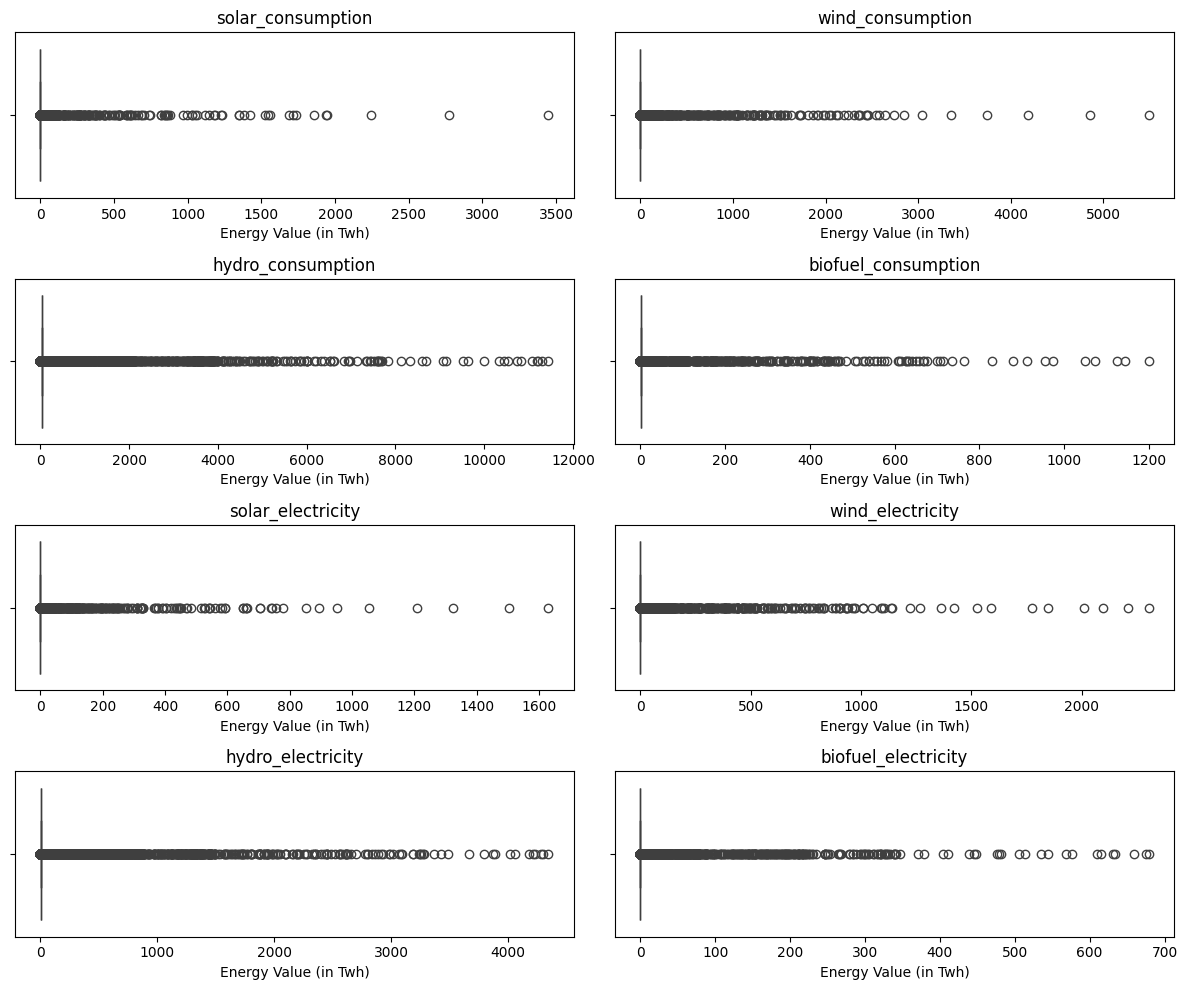

In [14]:
# Step 2: Create Box Plots

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create box plots for key numerical columns
for i, col in enumerate(key_numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=energy_data_cleaned[col])
    plt.title(f'{col}')
    plt.xlabel('Energy Value (in Twh)')

plt.tight_layout()
plt.show()

### **3. Data Analysis:**

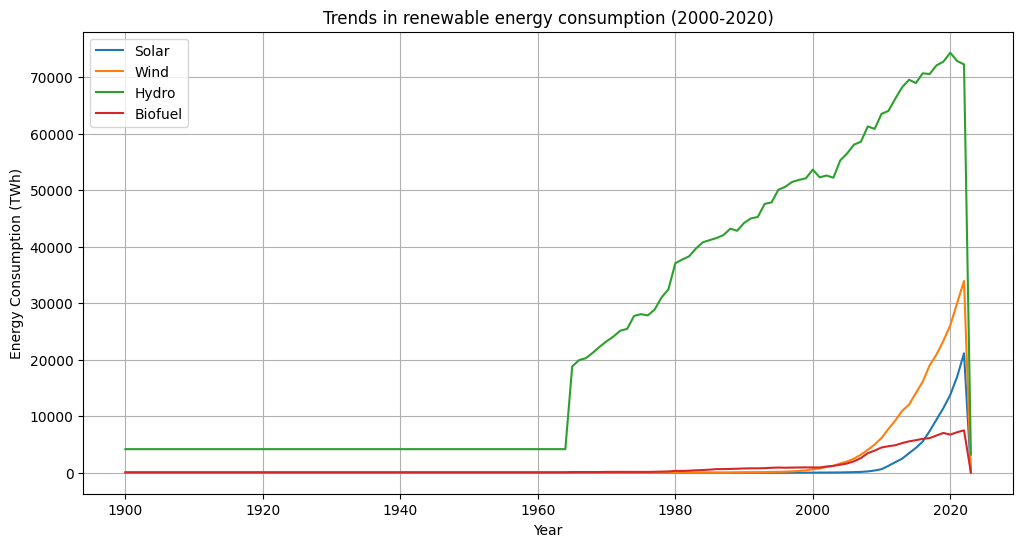

In [15]:
# Step 1: Trend Analysis

# Visualization of trends for each renewable energy source

renewable_sources = ['solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption']
source_labels = ['Solar', 'Wind', 'Hydro', 'Biofuel']

# Plotting the trends for each renewable energy source
plt.figure(figsize=(12, 6))

for source, label in zip(renewable_sources, source_labels):
    # Aggregating data by year
    yearly_data = cleaned_data.groupby('year')[source].sum().reset_index()
    plt.plot(yearly_data['year'], yearly_data[source], label=label)

plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Trends in renewable energy consumption (2000-2020)')
plt.legend()
plt.grid(True)
plt.show()

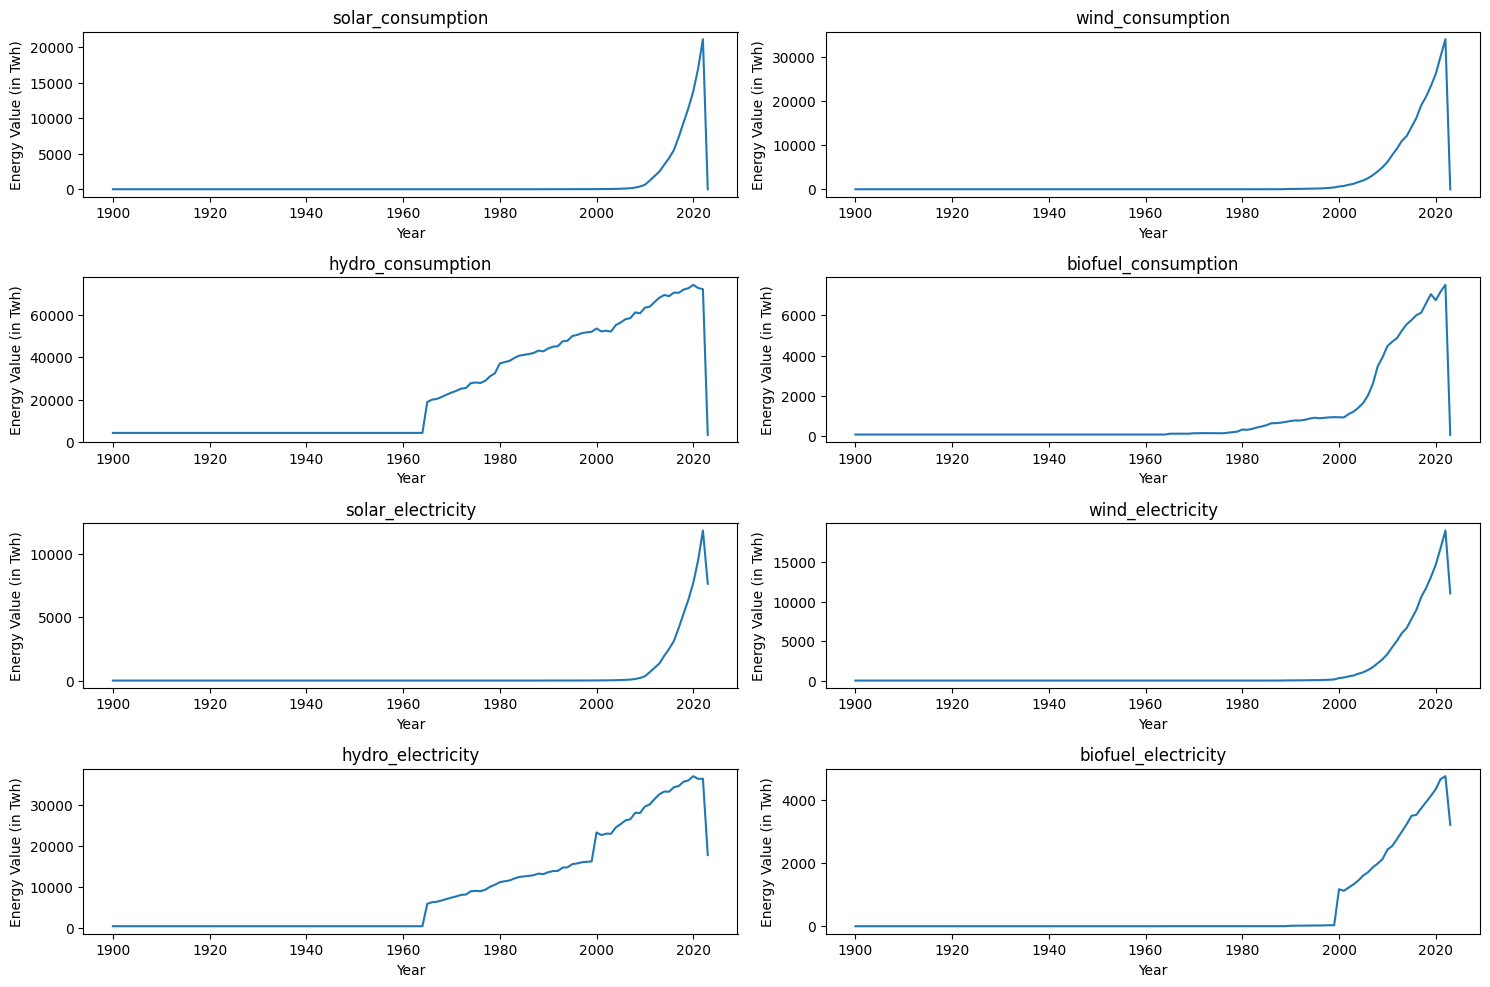

In [16]:
global_trends = energy_data_cleaned.groupby('year').sum().reset_index()

# Set up the matplotlib figure for time series plots
plt.figure(figsize=(15, 12))

# Create time series plots for each renewable energy consumption column
for i, col in enumerate(key_numerical_columns, 1):
    plt.subplot(5, 2, i)
    plt.plot(global_trends['year'], global_trends[col])
    plt.title(f'{col}')
    plt.xlabel('Year')
    plt.ylabel('Energy Value (in Twh)')

plt.tight_layout()
plt.show()

In [17]:
# Since we see a spike in values for most renewable energy sources around the year 2000, we can consider the year 2000 as the starting point of our study
energy_data_subset = energy_data_cleaned[(energy_data_cleaned["year"]>=2000) & (energy_data_cleaned["year"]<=2022)]

                     solar_consumption  wind_consumption  hydro_consumption  \
solar_consumption             1.000000          0.945404           0.628144   
wind_consumption              0.945404          1.000000           0.750929   
hydro_consumption             0.628144          0.750929           1.000000   
biofuel_consumption           0.710877          0.862349           0.805066   
solar_electricity             0.796252          0.748635           0.490185   
wind_electricity              0.744552          0.782182           0.576766   
hydro_electricity             0.540943          0.639889           0.832719   
biofuel_electricity           0.485856          0.556126           0.528149   

                     biofuel_consumption  solar_electricity  wind_electricity  \
solar_consumption               0.710877           0.796252          0.744552   
wind_consumption                0.862349           0.748635          0.782182   
hydro_consumption               0.805066     

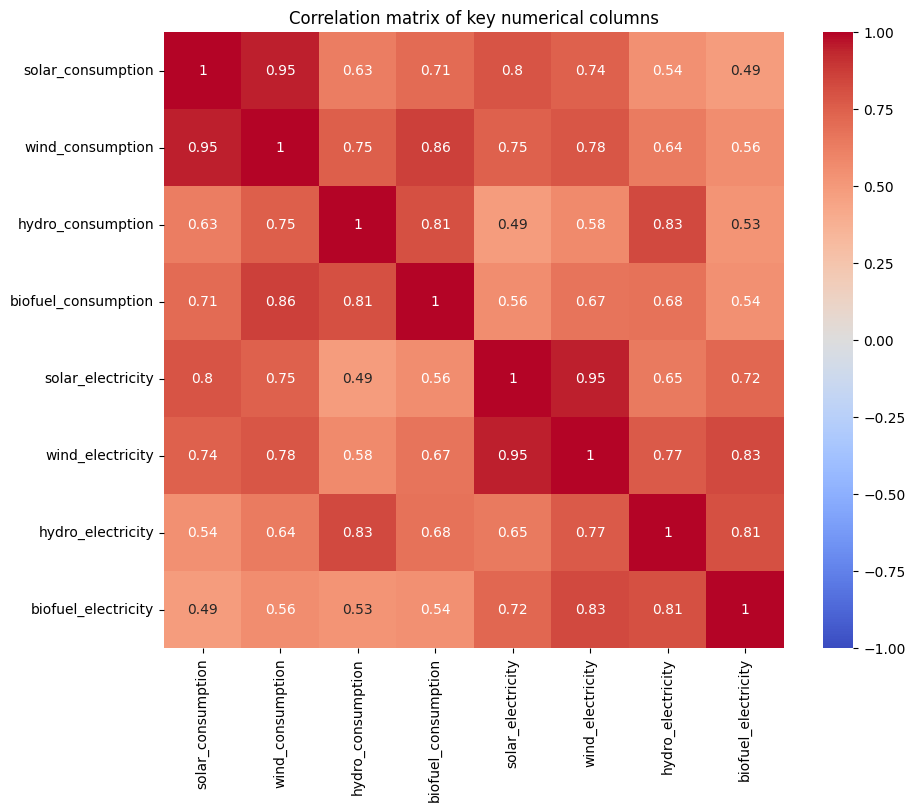

In [18]:
# Step 2: Correlation Analysis

# Normalize the key numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(energy_data_subset[key_numerical_columns]), columns=key_numerical_columns)

# Perform correlation analysis on normalized data
correlation_matrix_normalized = normalized_data.corr()

# Display the correlation matrix
print(correlation_matrix_normalized)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of key numerical columns')
plt.show()

In [19]:
# Step 3: Geospatial Analysis

# Here we are selecting the following variables to analyze the energy_per_capita share and other relevant attributes for visualization and potential trends in data
green_capita_data = energy_data_subset[["country", "year", "renewables_energy_per_capita", "energy_per_capita", "iso_code"]]
green_capita_2022 = green_capita_data[green_capita_data["year"] == 2022]
green_capita_2022["green_energy_perc"] = round((green_capita_2022["renewables_energy_per_capita"] / green_capita_2022["energy_per_capita"]), 2) * 100
green_capita_2022["green_energy_perc"] = green_capita_2022["green_energy_perc"].fillna(0)

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1179705812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_capita_2022["green_energy_perc"] = round((green_capita_2022["renewables_energy_per_capita"] / green_capita_2022["energy_per_capita"]), 2) * 100
C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1179705812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_capita_2022["green_energy_perc"] = green_capita_2022["green_energy_perc"].fillna(0)


In [20]:
# We use the Chloropleth map to obtain geospatial trends

# This visualization is for all renewable energy as a whole

# Visualization of per_capita_share of renewable energy consumption across the world in 2022

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=green_capita_2022["iso_code"],  # Spatial coordinates
    z=green_capita_2022["green_energy_perc"],  # Data to be color-coded
    colorscale="Greens",
    colorbar=dict(
        tickvals=[10, 20, 30, 40, 50, 60, 70, 80],
        ticktext=["0%-10%", "10%-20%", "20%-30%", "30%-40%", "40%-50%", "50%-60%", "60%-70%", ">=70%"],
        len=1  # Adjust length of color bar
    ),
    zmin=10,
    zmax=80  # Set the maximum value for the color bar
))

fig.update_layout(
    title_text="Per capita consumption of renewable energy for the year 2022",
    title_x=0.5,
    title_y=0.89,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection_type = "equirectangular"
    ),
    autosize = False,
    width=1000,
    height=600,
    legend=dict( # This parameter ain't working
        orientation="h",  # horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="right",
        x=0.5
    )
)

fig.show()

In [21]:
# Step 3a: Visualization of primary energy consumption from hydroelectric power

hydro_capita_data = energy_data_subset[["country", "year", "hydro_consumption", "renewables_consumption", "iso_code"]]
hydro_capita_2022 = hydro_capita_data[hydro_capita_data["year"] == 2022]
hydro_capita_2022["hydro_energy_perc"] = round((hydro_capita_2022["hydro_consumption"] / hydro_capita_2022["renewables_consumption"]), 2) * 100

# TODO: Remove all redundant code afterwards
hydro_capita_2022["hydro_energy_perc"] = hydro_capita_2022["hydro_energy_perc"].fillna(0)

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1475119737.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1475119737.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
fig = go.Figure(data=go.Choropleth(
    locations=hydro_capita_2022["iso_code"],  # Spatial coordinates
    z=hydro_capita_2022["hydro_energy_perc"],  # Data to be color-coded
    colorscale="Blues",
    colorbar=dict(
        tickvals=[10, 20, 30, 40, 50, 60, 70],
        ticktext=["0%-10%", "10%-20%", "20%-30%", "30%-40%", "40%-50%", "50%-60%", "60%-70%"],
        len=1  # Adjust length of color bar
    ),
    zmin=10,
    zmax=70  # Set the maximum value for the color bar
))

fig.update_layout(
    title_text="Per capita consumption of hydroelectric energy for the year 2022",
    title_x=0.5,
    title_y=0.89,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection_type = "equirectangular"
    ),
    autosize = False,
    width=1000,
    height=600,
    legend=dict( # This parameter ain't working
        orientation="h",  # horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="right",
        x=0.5
    )
)

fig.show()

In [23]:
# Step 3b: Visualization of per_capita_share of renewable energy generation across the world specifically for the year 2022
green_capita_data = energy_data_subset[["country", "year", "renewables_electricity", "electricity_generation", "iso_code"]]
green_capita_2022 = green_capita_data[green_capita_data["year"] == 2022]
green_capita_2022["green_energy_perc"] = round((green_capita_2022["renewables_electricity"] / green_capita_2022["electricity_generation"]), 2) * 100
green_capita_2022["green_energy_perc"] = green_capita_2022["green_energy_perc"].fillna(0)

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\4225044339.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\4225044339.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
fig = go.Figure(data=go.Choropleth(
    locations=green_capita_2022["iso_code"],  # Spatial coordinates
    z=green_capita_2022["green_energy_perc"],  # Data to be color-coded
    colorscale="Greens",
    colorbar=dict(
        tickvals=[10, 20, 30, 40, 50, 60, 70, 80],
        ticktext=["0%-10%", "10%-20%", "20%-30%", "30%-40%", "40%-50%", "50%-60%", "60%-70%", ">=70%"],
        len=1  # Adjust length of color bar
    ),
    zmin=10,
    zmax=80  # Set the maximum value for the color bar
))

fig.update_layout(
    title_text="Per capita generation of renewable energy for the year 2022",
    title_x=0.5,
    title_y=0.89,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection_type = "equirectangular"
    ),
    autosize = False,
    width=1000,
    height=600,
    legend=dict( # This parameter ain't working
        orientation="h",  # horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="right",
        x=0.5
    )
)

In [25]:
# Step 3c: Visualization of primary energy generation from hydroelectric energy across the world in 2022

# Filter the dataset for the latest year available in the dataset
country_lst = ["China", "United States", "Brazil", "Canada", "India", "Germany"]
latest_data = energy_data_subset[(energy_data_subset['year'] == 2022) & (energy_data_subset["country"].isin(country_lst))]


# Select relevant columns for renewable energy generation
renewable_columns = ['country', 'renewables_electricity']
renewable_data = latest_data[renewable_columns]
# renewable_data = renewable_data.rename(columns={"renewables_electricity": "renewable_generation"})

# The top 6 countries with the highest renewable energy generation
renewable_data = renewable_data.sort_values(by="renewables_electricity", ascending=False)

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=hydro_capita_2022["iso_code"],  # Spatial coordinates
    z=hydro_capita_2022["hydro_energy_perc"],  # Data to be color-coded
    colorscale="Blues",
    colorbar=dict(
        tickvals=[10, 20, 30, 40, 50, 60, 70],
        ticktext=["0%-10%", "10%-20%", "20%-30%", "30%-40%", "40%-50%", "50%-60%", "60%-70%"],
        len=1  # Adjust length of color bar
    ),
    zmin=10,
    zmax=70  # Set the maximum value for the color bar
))

fig.update_layout(
    title_text="Per capita generation of hydroelectric energy for the year 2022",
    title_x=0.5,
    title_y=0.89,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection_type = "equirectangular"
    ),
    autosize = False,
    width=1000,
    height=600,
    legend=dict( # This parameter ain't working
        orientation="h",  # horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="right",
        x=0.5
    )
)

fig.show()

### **4. Advanced Data Analysis:**

In [27]:
# Step 4a: Visualization of top 6 contributors in renewable energy consumption

# Picked the top 6 countries where renewable energy production/consumption is the highest
country_lst = ["China", "United States", "Brazil", "Canada", "India", "Germany"]
latest_data = energy_data_subset[(energy_data_subset['year'] == 2022) & (energy_data_subset["country"].isin(country_lst))]

# Select relevant columns for renewable energy consumption
renewable_columns = ['country', 'renewables_consumption']
renewable_data = latest_data[renewable_columns]
renewable_data = renewable_data.rename(columns={"renewables_consumption": "renewable_consumption"})

# Sort the data
renewable_data = renewable_data.sort_values(by='renewable_consumption', ascending=False)

In [28]:
# Plot the data using Plotly

import plotly.express as px

fig = px.bar(renewable_data, x='country', y='renewable_consumption',
             title='Renewable energy consumption for the year 2022',
             labels={'country': 'Country', 'renewable_consumption': 'Consumption Value (TWh)'},
             color_discrete_sequence=['rgb(246, 34, 46)'])

# Customize the plot
fig.update_layout(
    title_x=0.5,  # Center the title
    yaxis=dict(title_standoff=20),  # Space y-axis labels away from the plot
    xaxis=dict(tickfont=dict(size=14)),  # Increase x-axis label font size
    margin=dict(l=20, r=20, t=60, b=20),  # Decrease whitespace around the plot
    width=1000, height=600,  # Increase plot size
)

fig.show()

In [29]:
# Step 4b: Visualization of renewable energy consumption to visualize growth or decline between the time period 2000 and 2022 for these 6 countries

plot_data = energy_data_subset[['year', 'country', 'renewables_share_energy']]
plot_data = plot_data[plot_data['country'].isin(country_lst)]

In [30]:
# Create a line plot for renewable energy generation trends
fig = px.line(plot_data, x='year', y='renewables_share_energy', color='country',
              title='Renewable energy share consumption rate from 2000 to 2022',
              labels={'renewables_share_energy': 'Annual Growth/Decline (%)', 'year': 'Year'})

# Customize the plot
fig.update_layout(title_x=0.5, width=1000, height=500, xaxis=dict(showgrid=False, dtick=3, range=[2000, 2022]), legend_title="Country")
fig.show()

In [31]:
# Step 4c: Visualization of the top renewable energy sources for these 6 countries in the year 2022

filtered_data = energy_data_subset[(energy_data_subset["year"] == 2022) & (energy_data_subset["country"].isin(country_lst))]
energy_sources_columns = [
    'country', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption'
]

# Melt the data to get it in a long format
melted_data = filtered_data.melt(id_vars=['country'], value_vars = ['solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption'],
                                 var_name='energy_source', value_name='consumed_energy')

In [32]:
fig = px.bar(melted_data, x="country", y="consumed_energy", color="energy_source", barmode="group",
             title = "Share of top renewable sources in 2022",
             labels={'country': 'Country', 'Energy Consumption (TWh)': 'Energy Consumption (TWh)'})

fig.update_layout(
    title_x=0.5,  # Center the title
    yaxis=dict(title='Energy Consumption (TWh)', title_standoff=20, dtick=250),  # Space y-axis labels away from the plot
    xaxis=dict(tickfont=dict(size=14)),  # Increase x-axis label font size
    legend_title="Energy Source",
    margin=dict(l=20, r=20, t=60, b=20),  # Decrease whitespace around the plot
    width=1100, height=600  # Increase plot size
)

# Update trace names to change legend labels
newnames = {"solar_consumption": "Solar Energy", "wind_consumption": "Wind Energy", "hydro_consumption": "Hydro Energy", "biofuel_consumption": "Biofuel Energy"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     ))

fig.show()

In [33]:
# Step 4d: Visualization of annual change in GDP, energy demand and renewable consumption for these 6 countries

# Filter the dataset for China 1
yr_lst = range(2000, 2024)
china_data = energy_data_subset[(energy_data_subset["country"] == "China") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate year-on-year change for renewable energy generation, GDP growth, and energy demand
china_data["renewables_consumption_growth"] = china_data['renewables_consumption'].pct_change() * 100
china_data["gdp_growth"] = china_data['gdp'].pct_change() * 100
china_data["energy_demand_growth"] = china_data['primary_energy_consumption'].pct_change() * 100

# Plot data
plot_data = china_data[["year", "renewables_consumption_growth", "gdp_growth", "energy_demand_growth"]]
plot_data = plot_data.dropna()


# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=china_data['year'], y=china_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=china_data['year'], y=china_data['energy_demand_growth'], mode='lines+markers', name='Energy Demand Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=china_data['year'], y=china_data['renewables_consumption_growth'], mode='lines+markers',
                         name='Renewable Energy Consumption', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'China - GDP, energy demand and renewable consumption annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\860955847.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\860955847.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\860955847.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [34]:
# Filter the dataset for United States 2
yr_lst = range(2000, 2024)
us_data = energy_data_subset[(energy_data_subset["country"] == "United States") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
us_data["renewables_consumption_growth"] = us_data['renewables_consumption'].pct_change() * 100
us_data["gdp_growth"] = us_data['gdp'].pct_change() * 100
us_data["energy_demand_growth"] = us_data['primary_energy_consumption'].pct_change() * 100

# Plot data
plot_data = us_data[["year", "renewables_consumption_growth", "gdp_growth", "energy_demand_growth"]]
plot_data = plot_data.dropna()


# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=us_data['year'], y=us_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=us_data['year'], y=us_data['energy_demand_growth'], mode='lines+markers', name='Energy Demand Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=us_data['year'], y=us_data['renewables_consumption_growth'], mode='lines+markers',
                         name='Renewable Energy Consumption', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'USA - GDP, energy demand and renewable consumption annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1539181615.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1539181615.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1539181615.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [35]:
# Filter the dataset for Brazil 3
yr_lst = range(2000, 2024)
brazil_data = energy_data_subset[(energy_data_subset["country"] == "Brazil") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
brazil_data["renewables_consumption_growth"] = brazil_data['renewables_consumption'].pct_change() * 100
brazil_data["gdp_growth"] = brazil_data['gdp'].pct_change() * 100
brazil_data["energy_demand_growth"] = brazil_data['primary_energy_consumption'].pct_change() * 100

# Plot data
plot_data = brazil_data[["year", "renewables_consumption_growth", "gdp_growth", "energy_demand_growth"]]
plot_data = plot_data.dropna()


# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=brazil_data['year'], y=brazil_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=brazil_data['year'], y=brazil_data['energy_demand_growth'], mode='lines+markers', name='Energy Demand Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=brazil_data['year'], y=brazil_data['renewables_consumption_growth'], mode='lines+markers',
                         name='Renewable Energy Consumption', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Brazil - GDP, energy demand and renewable consumption annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2165148046.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2165148046.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2165148046.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [36]:
# Filter the dataset for Canada 4
yr_lst = range(2000, 2024)
canada_data = energy_data_subset[(energy_data_subset["country"] == "Canada") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
canada_data["renewables_consumption_growth"] = canada_data['renewables_consumption'].pct_change() * 100
canada_data["gdp_growth"] = canada_data['gdp'].pct_change() * 100
canada_data["energy_demand_growth"] = canada_data['primary_energy_consumption'].pct_change() * 100

# Plot data
plot_data = canada_data[["year", "renewables_consumption_growth", "gdp_growth", "energy_demand_growth"]]
plot_data = plot_data.dropna()


# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=canada_data['year'], y=canada_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=canada_data['year'], y=canada_data['energy_demand_growth'], mode='lines+markers', name='Energy Demand Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=canada_data['year'], y=canada_data['renewables_consumption_growth'], mode='lines+markers',
                         name='Renewable Energy Consumption', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Canada - GDP, energy demand and renewable consumption annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3979538095.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3979538095.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3979538095.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [37]:
# Filter the dataset for India 5
yr_lst = range(2000, 2024)
india_data = energy_data_subset[(energy_data_subset["country"] == "India") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
india_data["renewables_consumption_growth"] = india_data['renewables_consumption'].pct_change() * 100
india_data["gdp_growth"] = india_data['gdp'].pct_change() * 100
india_data["energy_demand_growth"] = india_data['primary_energy_consumption'].pct_change() * 100

# Plot data
plot_data = india_data[["year", "renewables_consumption_growth", "gdp_growth", "energy_demand_growth"]]
plot_data = plot_data.dropna()


# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=india_data['year'], y=india_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=india_data['year'], y=india_data['energy_demand_growth'], mode='lines+markers', name='Energy Demand Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=india_data['year'], y=india_data['renewables_consumption_growth'], mode='lines+markers',
                         name='Renewable Energy Consumption', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'India - GDP, energy demand and renewable consumption annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\116802120.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\116802120.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\116802120.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [38]:
# Filter the dataset for Germany 6
yr_lst = range(2000, 2024)
germany_data = energy_data_subset[(energy_data_subset["country"] == "Germany") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
germany_data["renewables_consumption_growth"] = germany_data['renewables_consumption'].pct_change() * 100
germany_data["gdp_growth"] = germany_data['gdp'].pct_change() * 100
germany_data["energy_demand_growth"] = germany_data['primary_energy_consumption'].pct_change() * 100

# Plot data
plot_data = germany_data[["year", "renewables_consumption_growth", "gdp_growth", "energy_demand_growth"]]
plot_data = plot_data.dropna()


# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=germany_data['year'], y=germany_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=germany_data['year'], y=germany_data['energy_demand_growth'], mode='lines+markers', name='Energy Demand Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=germany_data['year'], y=germany_data['renewables_consumption_growth'], mode='lines+markers',
                         name='Renewable Energy Consumption', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Germany - GDP, energy demand and renewable consumption annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\263333377.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\263333377.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\263333377.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

### **5. Visualizations of Energy Generation**

In [39]:
# Step 5a: Visualization of top 6 countries in renewable energy generation

# Filter the dataset for the latest year available in the dataset
country_lst = ["China", "United States", "Brazil", "Canada", "India", "Germany"]
latest_data = energy_data_subset[(energy_data_subset['year'] == 2022) & (energy_data_subset["country"].isin(country_lst))]


# Select relevant columns for renewable energy generation
renewable_columns = ['country', 'renewables_electricity']
renewable_data = latest_data[renewable_columns]
renewable_data = renewable_data.rename(columns={"renewables_electricity": "renewable_generation"})

# The top 6 countries with the highest renewable energy generation
renewable_data = renewable_data.sort_values(by='renewable_generation', ascending=False)

In [40]:
# Plot the data using Plotly
fig = px.bar(renewable_data, x='country', y='renewable_generation',
             title='Renewable energy generation in 2022',
             labels={'country': 'Country', 'renewable_generation': 'Generation Value (TWh)'},
             color_discrete_sequence=['rgb(102, 166, 30)'])

# Customize the plot
fig.update_layout(
    title_x=0.5,  # Center the title
    yaxis=dict(title_standoff=20),  # Space y-axis labels away from the plot
    xaxis=dict(tickfont=dict(size=14)),  # Increase x-axis label font size
    margin=dict(l=20, r=20, t=60, b=20),  # Decrease whitespace around the plot
    width=1000, height=600,  # Increase plot size
)

fig.show()

In [41]:
# Step 5b: Visualization of renewable energy generation growth or decline between 2000 and 2022
plot_data = energy_data_subset[['year', 'country', 'renewables_share_elec']]
plot_data = plot_data[plot_data['country'].isin(country_lst)]

In [42]:
# Create an area plot for renewable energy generation trends
fig = px.line(plot_data, x='year', y='renewables_share_elec', color='country',
              title='Renewable energy share generation rate from 2000 to 2022',
              labels={'renewables_share_elec': 'Annual Growth/Decline (%)', 'year': 'Year'})

# Customize the plot
fig.update_layout(title_x=0.5, width=1000, height=500, xaxis=dict(showgrid=False, dtick=3, range=[2000, 2022]), legend_title="Country")
fig.show()

In [43]:
# Step 5c: Visualization of top renewable generation sources for these 6 countries in 2022
filtered_data = energy_data_subset[(energy_data_subset["year"] == 2022) & (energy_data_subset["country"].isin(country_lst))]
energy_sources_columns = [
    'country', 'solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity'
]

# Melt the data to get it in a long format
melted_data = filtered_data.melt(id_vars=['country'], value_vars = ['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity'],
                                 var_name='energy_source', value_name='generated_energy')

In [44]:
fig = px.bar(melted_data, x="country", y="generated_energy", color="energy_source", barmode="group",
             title = "Share of top renewable generation sources in 2022",
             labels={'country': 'Country', 'Energy Generation (TWh)': 'Energy Generation (TWh)'})

fig.update_layout(
    title_x=0.5,  # Center the title
    yaxis=dict(title='energy generation (TWh)', title_standoff=20, dtick=250),  # Space y-axis labels away from the plot
    xaxis=dict(tickfont=dict(size=14)),  # Increase x-axis label font size
    legend_title="Energy Source",
    margin=dict(l=20, r=20, t=60, b=20),  # Decrease whitespace around the plot
    width=1100, height=600  # Increase plot size
)

# Update trace names to change legend labels
newnames = {"solar_electricity": "Solar Energy", "wind_electricity": "Wind energy", "hydro_electricity": "Hydro Energy", "biofuel_electricity": "Biofuel Energy"}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     ))

fig.show()

In [45]:
# Step 5d: Visualization of annual change in GDP, energy demand and renewable generation in these 6 countries

# Filter the dataset for China 1
yr_lst = range(2000, 2024)
china_data = energy_data_subset[(energy_data_subset["country"] == "China") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
china_data["renewables_generation_growth"] = china_data['renewables_electricity'].pct_change() * 100
china_data["gdp_growth"] = china_data['gdp'].pct_change() * 100
china_data["energy_generation_growth"] = china_data['electricity_generation'].pct_change() * 100

# Plot data
plot_data = china_data[["year", "renewables_generation_growth", "gdp_growth", "energy_generation_growth"]]
plot_data = plot_data.dropna()

# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=china_data['year'], y=china_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=china_data['year'], y=china_data['energy_generation_growth'], mode='lines+markers', name='Energy Generation Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=china_data['year'], y=china_data['renewables_generation_growth'], mode='lines+markers',
                         name='Renewable Energy Generation', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'China - GDP, energy generation and renewable generation annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()


C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3583220660.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3583220660.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\3583220660.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [46]:
# Filter the dataset for USA 2

yr_lst = range(2000, 2024)
usa_data = energy_data_subset[(energy_data_subset["country"] == "United States") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
usa_data["renewables_generation_growth"] = usa_data['renewables_electricity'].pct_change() * 100
usa_data["gdp_growth"] = usa_data['gdp'].pct_change() * 100
usa_data["energy_generation_growth"] = usa_data['electricity_generation'].pct_change() * 100

# Plot data
plot_data = usa_data[["year", "renewables_generation_growth", "gdp_growth", "energy_generation_growth"]]
plot_data = plot_data.dropna()

# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=usa_data['year'], y=usa_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=usa_data['year'], y=usa_data['energy_generation_growth'], mode='lines+markers', name='Energy Generation Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=usa_data['year'], y=usa_data['renewables_generation_growth'], mode='lines+markers',
                         name='Renewable Energy Generation', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'USA - GDP, energy generation and renewable generation annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2505287301.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2505287301.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2505287301.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [47]:
# Filter the dataset for Brazil 3

yr_lst = range(2000, 2024)
brazil_data = energy_data_subset[(energy_data_subset["country"] == "Brazil") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
brazil_data["renewables_generation_growth"] = brazil_data['renewables_electricity'].pct_change() * 100
brazil_data["gdp_growth"] = brazil_data['gdp'].pct_change() * 100
brazil_data["energy_generation_growth"] = brazil_data['electricity_generation'].pct_change() * 100

# Plot data
plot_data = brazil_data[["year", "renewables_generation_growth", "gdp_growth", "energy_generation_growth"]]
plot_data = plot_data.dropna()

# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=brazil_data['year'], y=brazil_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=brazil_data['year'], y=brazil_data['energy_generation_growth'], mode='lines+markers', name='Energy Generation Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=brazil_data['year'], y=brazil_data['renewables_generation_growth'], mode='lines+markers',
                         name='Renewable Energy Generation', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Brazil - GDP, energy generation and renewable generation annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1447525996.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1447525996.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1447525996.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [48]:
# Filter the dataset for Canada 4

yr_lst = range(2000, 2024)
canada_data = energy_data_subset[(energy_data_subset["country"] == "Canada") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
canada_data["renewables_generation_growth"] = canada_data['renewables_electricity'].pct_change() * 100
canada_data["gdp_growth"] = canada_data['gdp'].pct_change() * 100
canada_data["energy_generation_growth"] = canada_data['electricity_generation'].pct_change() * 100

# Plot data
plot_data = canada_data[["year", "renewables_generation_growth", "gdp_growth", "energy_generation_growth"]]
plot_data = plot_data.dropna()

# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=canada_data['year'], y=canada_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=canada_data['year'], y=canada_data['energy_generation_growth'], mode='lines+markers', name='Energy Generation Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=canada_data['year'], y=canada_data['renewables_generation_growth'], mode='lines+markers',
                         name='Renewable Energy Generation', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Canada - GDP, energy generation and renewable generation annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1633260962.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1633260962.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1633260962.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [49]:
# Filter the dataset for India 5

yr_lst = range(2000, 2024)
india_data = energy_data_subset[(energy_data_subset["country"] == "India") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
india_data["renewables_generation_growth"] = india_data['renewables_electricity'].pct_change() * 100
india_data["gdp_growth"] = india_data['gdp'].pct_change() * 100
india_data["energy_generation_growth"] = india_data['electricity_generation'].pct_change() * 100

# Plot data
plot_data = india_data[["year", "renewables_generation_growth", "gdp_growth", "energy_generation_growth"]]
plot_data = plot_data.dropna()

# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=india_data['year'], y=india_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=india_data['year'], y=india_data['energy_generation_growth'], mode='lines+markers', name='Energy Generation Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=india_data['year'], y=india_data['renewables_generation_growth'], mode='lines+markers',
                         name='Renewable Energy Generation', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'India - GDP, energy generation and renewable generation annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1832032641.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1832032641.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\1832032641.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [50]:
# Filter the dataset for Germany 6

yr_lst = range(2000, 2024)
germany_data = energy_data_subset[(energy_data_subset["country"] == "Germany") & (energy_data_subset["year"].isin(yr_lst))]

# Calculate YOY change for renewable energy generation, GDP growth, and energy demand
germany_data["renewables_generation_growth"] = germany_data['renewables_electricity'].pct_change() * 100
germany_data["gdp_growth"] = germany_data['gdp'].pct_change() * 100
germany_data["energy_generation_growth"] = germany_data['electricity_generation'].pct_change() * 100

# Plot data
plot_data = germany_data[["year", "renewables_generation_growth", "gdp_growth", "energy_generation_growth"]]
plot_data = plot_data.dropna()

# Plotting the data
fig = go.Figure()

# Add GDP growth to the plot
fig.add_trace(go.Scatter(x=germany_data['year'], y=germany_data['gdp_growth'], mode='lines+markers', name='GDP Growth', line=dict(color='blue')))

# Add energy demand YOY change to the plot
fig.add_trace(go.Scatter(x=germany_data['year'], y=germany_data['energy_generation_growth'], mode='lines+markers', name='Energy Generation Growth', line=dict(color='green')))

# Add renewable energy generation YOY change to the plot
fig.add_trace(go.Scatter(x=germany_data['year'], y=germany_data['renewables_generation_growth'], mode='lines+markers',
                         name='Renewable Energy Generation', line=dict(color='red')))

# Update layout
fig.update_layout(
    title={
        'text': 'Germany - GDP, energy generation and renewable generation annual change',
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Adjust the vertical position of the title
        'font': dict(size=18)  # Increase the font size of the title
    },
    xaxis_title='Year',
    yaxis_title='Percentage Change (%)',
    legend_title='Indicators',
    xaxis=dict(showgrid=True, gridcolor='#CCCCCC', tickmode='linear', dtick=3),  # Add horizontal gridlines
    yaxis=dict(showgrid=True, gridcolor='#CCCCCC'),  # Add vertical gridlines
    width=1100,  # Increase the width of the plot
    height=500  # Increase the height of the plot
)


# Show the plot
fig.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2483731874.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2483731874.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2483731874.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

### **6. Renewable Energy Investments Visualizations**

In [51]:
# Step 6a: Visualization of investments in renewable energy generation in 2022
invest_data = pd.read_csv('data\invest-main.csv')
data = invest_data[(invest_data["Metric"]=="Renewables") & (invest_data["region"]!="World")]
invest_2022 = data[["2022", "region"]]

In [52]:
# Create the pie chart with rounded percentage labels
fig = px.pie(invest_2022, values="2022", names='region',
             title='Investments in renewable energy generation for the year 2022',
             hover_data=["2022"],
            )

# Customize layout
fig.update_layout(
    title_x=0.5,  # Center the title
    margin=dict(l=30, r=10, t=100, b=50),  # Reduce whitespace around plot
    width=800,  # Increase plot width
    height=600,  # Increase plot height
    font=dict(size=14)  # Increase font size
)

fig.show()

In [53]:
# Step 6b: Visualization of percentage variation in various energy attributes
world_2015_2022 = energy_data[(energy_data["year"]>=2015) & (energy_data["year"]<=2022) & (energy_data["country"]=="World")]
renewable_invest = invest_data[(invest_data["Metric"]=="Renewables") & (invest_data["region"]=="World")]
renewable_invest = renewable_invest.T
renewable_invest = renewable_invest.iloc[1:-2, :].rename(columns={3: 'Investment (Billion $)'})
renewable_invest["perc_change"] = renewable_invest["Investment (Billion $)"].pct_change()
renewable_invest = renewable_invest.dropna()

renewable_invest_copy = renewable_invest.iloc[:, :].rename(columns={3: 'Investment (Billion $)'})
renewable_invest_copy["perc_change"] = renewable_invest_copy["Investment (Billion $)"].pct_change()
renewable_invest_copy = renewable_invest_copy.dropna()

req_cols = ['year', 'country', 'population', 'gdp', 'renewables_electricity', 'primary_energy_consumption', 'electricity_generation', 'fossil_fuel_consumption']
world_2015_2022 =  world_2015_2022[req_cols]

# Parallel plot variables
world_2015_2022_copy = world_2015_2022.copy()
cols_to_change = ['population', 'gdp', 'renewables_electricity', 'primary_energy_consumption', 'electricity_generation', 'fossil_fuel_consumption']
world_2015_2022_copy[cols_to_change] = (world_2015_2022_copy[cols_to_change].pct_change().round(2))*100
world_2015_2022_copy = world_2015_2022_copy.dropna()
world_2015_2022_copy["investment_perc_change"] = renewable_invest["perc_change"].values
world_2015_2022_copy["investment_perc_change"] = (world_2015_2022_copy["investment_perc_change"].round(2))*100
world_plot = world_2015_2022_copy.T
world_plot.columns = world_plot.loc["year", : ].values
world_plot = world_plot[1: ]
world_plot = world_plot.reset_index()
world_plot = world_plot.rename(columns={"index": "category"})
world_plot.columns = ["category", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2262050798.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\srira\AppData\Local\Temp\ipykernel_23404\2262050798.py:10: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



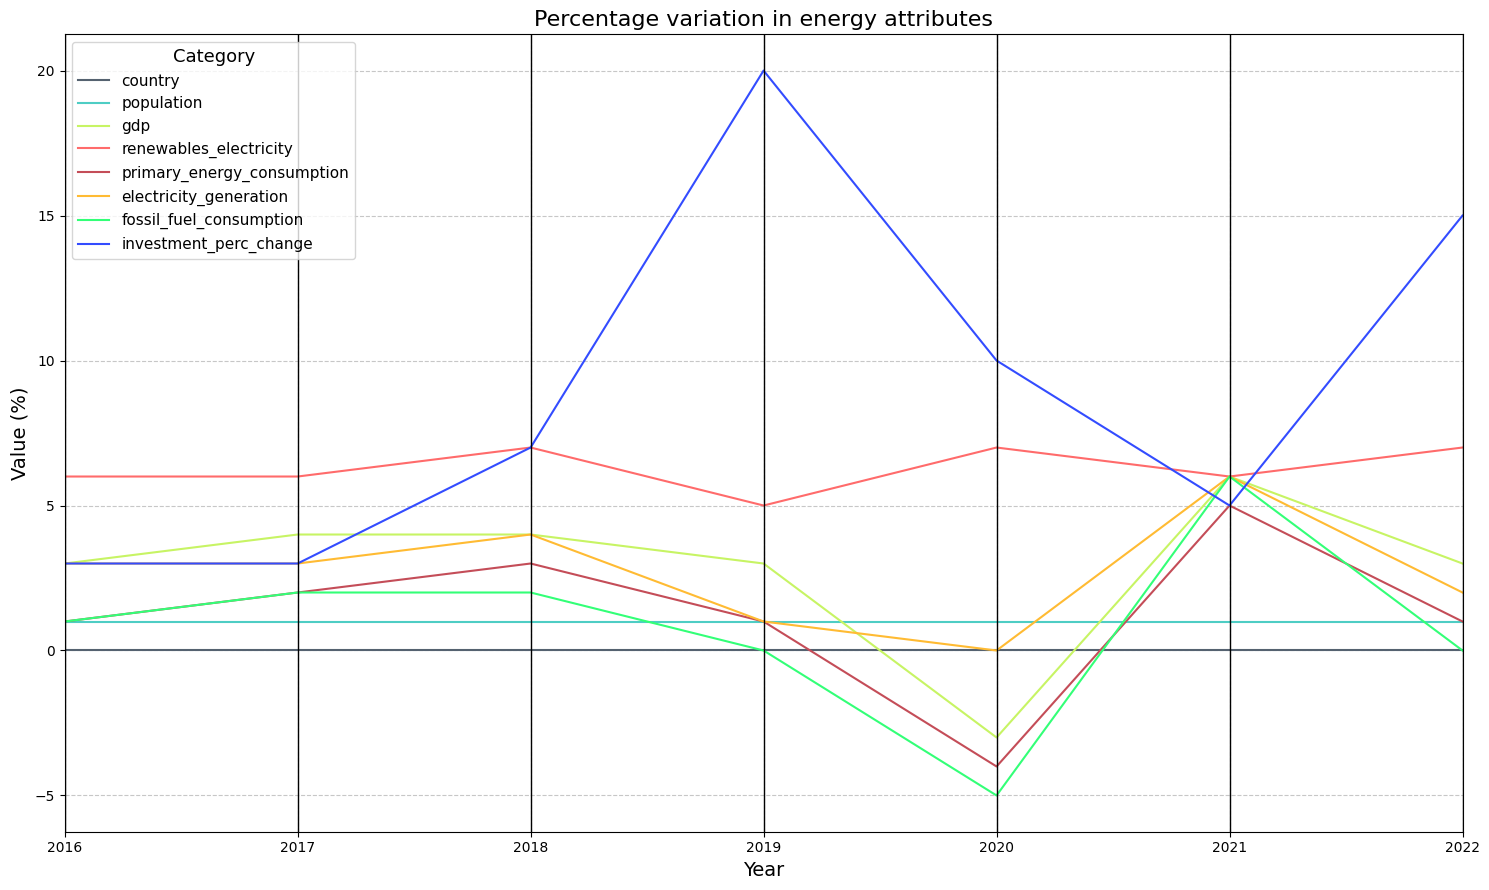

In [54]:
# Define a list of 9 different colors
colors = ['#556270', '#4ECDC4', '#C7F464', '#FF6B6B', '#C44D58', '#FFBB33', '#33FF77', '#334CFF', '#FF33A8']

# Create the plot
plt.figure(figsize=(15, 9))
pd.plotting.parallel_coordinates(
    world_plot,
    class_column='category',
    cols=["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    color=colors
)

# Add scale
plt.yscale("linear")

# Customize the plot
plt.title('Percentage variation in energy attributes', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(title='Category', title_fontsize='13', fontsize='11', loc='best')

# Show plot
plt.tight_layout()
plt.show()

In [55]:
# Step 6c: Visualization of global investment growth in renewable energy
invest_subset = invest_data[invest_data["region"] == "World"]
invest_data_transposed = invest_subset.T
invest_data_transposed = invest_data_transposed[1: -1]
invest_data_transposed.columns = ["Coal", "Oil and natural gas", "Nuclear", "Renewables", "Fossil CCUS"]
invest_data_transposed = invest_data_transposed.reset_index()
invest_data_transposed = invest_data_transposed.rename(columns={"index": "year"})
invest_data_transposed["Non_renewables"] = invest_data_transposed["Coal"] + invest_data_transposed["Oil and natural gas"] + invest_data_transposed["Nuclear"] + invest_data_transposed["Fossil CCUS"]

In [56]:
# Create a line plot
fig = px.line(invest_data_transposed, x="year", y=["Renewables", "Non_renewables"],
              title="Global investment growth/decline rate in renewable energy",
              labels={"value": "Investment (in billion $)",
                      "year": "Year"})

# Customzie the plot
fig.update_layout(title_x=0.5, width=800, height=500, xaxis=dict(showgrid=False),
                  legend_title="Category")
fig.show()

In [57]:
# Step 6d: Visualization of investment growth rate in renewable energy
import numpy as np

# Melt the dataframe to have years as values
yr_lst_str = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
melted_data = pd.melt(invest_data, id_vars=['region', 'Metric'], value_vars=yr_lst_str, var_name="Year", value_name="Value")
melted_data_world = melted_data[melted_data["region"] == "World"]
summed_invest_df =  pd.DataFrame(melted_data.groupby(["region", "Year"])["Value"].sum()).reset_index()
melted_data_renewables = melted_data[melted_data["Metric"] == "Renewables"]
melted_data_renewables = melted_data_renewables.reset_index(drop=True)
merged_df = pd.merge(left=melted_data_renewables, right=summed_invest_df, on=['region', 'Year'], how='inner')
merged_df = merged_df.rename(columns={"Value_x": "renewable_invest", "Value_y": "total_invest"})
merged_df["renewable_perc"] = np.round(merged_df["renewable_invest"] / merged_df["total_invest"], 2) * 100

In [58]:
# Create a line plot
fig = px.line(merged_df, x="Year", y="renewable_perc", color="region",
              title="Investment growth rate in renewable energy across regions",
              labels={"renewable_perc": "Investment Growth (%)"})

# Customzie the plot
fig.update_layout(title_x=0.5, width=1000, xaxis=dict(showgrid=False),
                  legend_title="Region")
fig.show()